In [90]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage.morphology import disk

def getImage(image):
    path = '/Users/alexandrasmith/Desktop/Digital Image Processing 793/Assignment 5/'
    im = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    return im

def Otsu(image):
    # normalise histogram
    # calculate number of pixels with each intensity value
    histogram_array = np.bincount(image.flatten(), minlength=256)
    # normalise
    num_pixels = np.sum(histogram_array)
    p = histogram_array/num_pixels
    # loop through each possible threshold value k
    optimal_k = -1
    var = -1 
    # get global mean
    ii = list(range(0, len(p)))
    global_mean = np.sum([a*b for a, b in zip(ii, p)])
    # get global variance
    iii = ii - global_mean
    global_variance = np.sum([(a**2)*b for a, b in zip(iii, p)])
    for k in range(len(p)):
        # compute cumulative sum (probability of class occruing)
        P1 = np.sum(p[:k])
        # compute cumulative mean
        i = list(range(0, k))
        m = np.sum([a*b for a, b in zip(i, p[:k])])
        # compute between-class variance
        class_variance = ((global_mean*P1 - m)**2)/(P1*(1-P1))
        # check if maximum
        if class_variance > var:
            optimal_k = k
            var = class_variance
    # obtain thresholded image
    thresh_img = image.copy()
    thresh_img[image > optimal_k] = 255
    thresh_img[image < optimal_k] = 0
    measure = var/global_variance
    return thresh_img, measure

Separability measure: 0.746588155853912


<ipython-input-90-2a6c31c07dd9>:35: RuntimeWarning: invalid value encountered in double_scalars
  class_variance = ((global_mean*P1 - m)**2)/(P1*(1-P1))


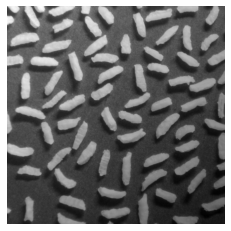

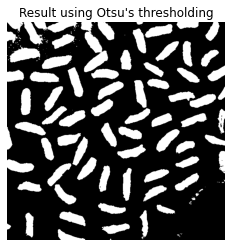

In [93]:
# QUESTION 2
rice = getImage('rice_shaded.tif') # 600 x 600
plt.figure()
plt.axis("off")
plt.imshow(rice, cmap="gray")

# a)
thresh, eta = Otsu(rice)
print("Separability measure: {}".format(eta))
plt.figure()
plt.axis("off")
plt.title("Result using Otsu's thresholding")
plt.imshow(thresh, cmap="gray")
# # Thresholding using Otsu (use to check own algorithm)
# (T, thresh) = cv2.threshold(rice, 20, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# plt.figure()
# plt.axis("off")
# plt.title("Result using Otsu's thresholding")
# plt.imshow(thresh, cmap="gray")



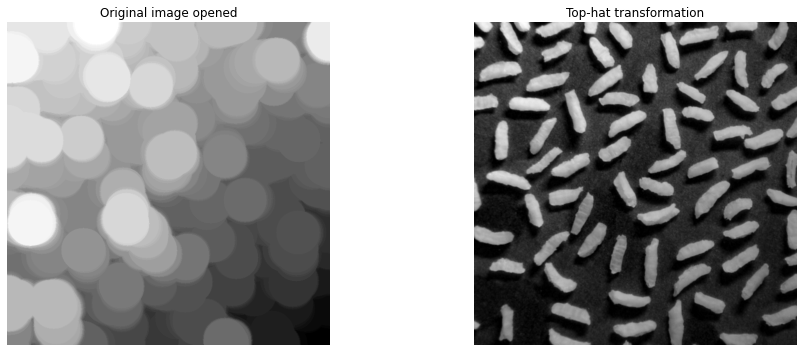

Separability measure: 0.836616421323277


<ipython-input-90-2a6c31c07dd9>:35: RuntimeWarning: invalid value encountered in double_scalars
  class_variance = ((global_mean*P1 - m)**2)/(P1*(1-P1))


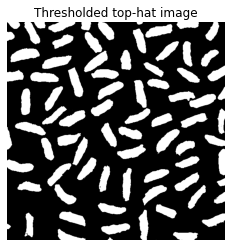

In [94]:
# b)
se = disk(40)
open = cv2.morphologyEx(rice, cv2.MORPH_OPEN, se)
top_hat = rice - open

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(open, cmap='gray')
plt.title("Original image after opening")
plt.axis('off')
plt.subplot(132)
plt.imshow(top_hat, cmap='gray')
plt.title("Top-hat transformation")
plt.axis('off')
plt.tight_layout()
plt.show()

thresh2, eta2 = Otsu(top_hat.astype(np.uint8))
print("Separability measure: {}".format(eta2))
plt.figure()
plt.axis("off")
plt.title("Thresholded top-hat image")
plt.imshow(thresh2, cmap="gray")